# Importing and file loading

names of variables that have been loaded and saved as csv files:
    url - loaded, not saved
    attendance - loaded, and saved
    all_home_teams
    all_away_teams
    all_teams
    all_team_names
    season
    season_year
    date
    

In [1]:
#imports important libraries for processing the data
import math
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
import time
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
column_name = ['link_match']
df = pd.read_csv('EPL Workbook.csv', skipinitialspace=True, usecols=column_name)
print(df)

                                     link_match
0      https://www.premierleague.com/match/7186
1      https://www.premierleague.com/match/7404
2      https://www.premierleague.com/match/7255
3      https://www.premierleague.com/match/7126
4      https://www.premierleague.com/match/7350
...                                         ...
4065  https://www.premierleague.com/match/59113
4066  https://www.premierleague.com/match/59177
4067  https://www.premierleague.com/match/59178
4068  https://www.premierleague.com/match/59182
4069  https://www.premierleague.com/match/59052

[4070 rows x 1 columns]


In [3]:
df = df.values.tolist()
print(df)

[['https://www.premierleague.com/match/7186'], ['https://www.premierleague.com/match/7404'], ['https://www.premierleague.com/match/7255'], ['https://www.premierleague.com/match/7126'], ['https://www.premierleague.com/match/7350'], ['https://www.premierleague.com/match/7096'], ['https://www.premierleague.com/match/7166'], ['https://www.premierleague.com/match/7258'], ['https://www.premierleague.com/match/7226'], ['https://www.premierleague.com/match/7106'], ['https://www.premierleague.com/match/7317'], ['https://www.premierleague.com/match/7423'], ['https://www.premierleague.com/match/7266'], ['https://www.premierleague.com/match/7362'], ['https://www.premierleague.com/match/7245'], ['https://www.premierleague.com/match/7373'], ['https://www.premierleague.com/match/7445'], ['https://www.premierleague.com/match/7277'], ['https://www.premierleague.com/match/7278'], ['https://www.premierleague.com/match/7279'], ['https://www.premierleague.com/match/7280'], ['https://www.premierleague.com/m

# Web scraping

headers = {'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/106.0.0.0 Safari/537.36 OPR/92.0.0.0'}
attendance = []
   
    
error_games = []
error_count = 0

for i in range(len(df)):
    url = df[i][0]
    r = requests.get(url, headers = headers)
    
    soup = BeautifulSoup(r.text, 'html.parser')
    titles = []
    titles.append(soup.title.text)

    try:
        get_attendance = soup.find('div', {'class': 'attendance show-m'}).text
    except:
        error_games.append(url)
        get_attendance = ' | Att: 0,'
        print('ERROR: ',error_games[error_count])
        error_count += 1

    str = get_attendance
    removal_1 = str.replace(' | Att: ','')
    str = removal_1
    removal_2 = str.replace(',','')
    print(removal_2)
    
    attendance.append(removal_2)


# Data saving

print(attendance)

np.savetxt("attendance_strings.csv", attendance, delimiter =", ", fmt ='% s')

int_attendance = []
for i in range(len(attendance)+1):
    if i == 0:
        int_attendance.append('Attendance')
    else:
        int_attendance.append(int(attendance[i-1]))

for i in range(len(attendance)):
    attendance[i] = int_attendance[i]

np.savetxt("attendance_integers.csv", int_attendance, delimiter =", ", fmt ='% s')

# Loading attendance

In [4]:
df = pd.read_csv('attendance_integers.csv', skipinitialspace=True)
attendance_in_list = df.values.tolist()
attendance_from_file = []
for i in range(len(attendance_in_list)):
    attendance_from_file.append(attendance_in_list[i][0])

attendance = []
for i in range(len(attendance_from_file)):
    attendance.append(attendance_from_file[i])

# All attendance graph

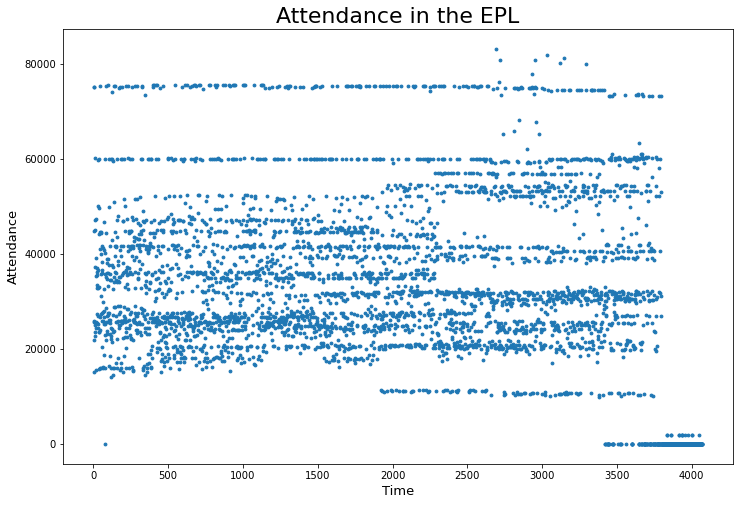

In [5]:
figure, ax2 = plt.subplots(figsize=(12, 8))
#ax2.set_ylim(-0.01,1.05)
#ax2.set_xlim(380, 750)
x = []
for i in range(len(attendance)):
    x.append(i+1)
y = attendance

ax2.scatter(x, y,label = 'yeahhhh',s=8)

plt.title('Attendance in the EPL', fontsize = 22)
plt.xlabel('Time', fontsize = 13)
plt.ylabel('Attendance', fontsize = 13)
#plt.legend()

plt.show()
#plt.savefig('AllNomalized.png')

# Getting time data

In [6]:
#gets the season year
column_name = ['season']
df = pd.read_csv('EPL Workbook.csv', skipinitialspace=True, usecols=column_name)
season_in_list = df.values.tolist()
season = []
for i in range(len(season_in_list)):
    season.append(season_in_list[i][0])

season_year = []
#season_year.append('season_year')

for j in range(len(season)):
    if season[j] == '10/11':
        season_year.append(2010)
    elif season[j] == '11/12':
        season_year.append(2011)
    elif season[j] == '12/13':
        season_year.append(2012)
    elif season[j] == '13/14':
        season_year.append(2013)
    elif season[j] == '14/15':
        season_year.append(2014)
    elif season[j] == '15/16':
        season_year.append(2015)
    elif season[j] == '16/17':
        season_year.append(2016)
    elif season[j] == '17/18':
        season_year.append(2017)
    elif season[j] == '18/19':
        season_year.append(2018)
    elif season[j] == '19/20':
        season_year.append(2019)
    elif season[j] == '20/21':
        season_year.append(2020)
        
print(season_year)

np.savetxt("season_year.csv", season_year, delimiter =", ", fmt ='% s')

[2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 201

In [7]:
#gets the date
column_name = ['date']
df = pd.read_csv('EPL Workbook.csv', skipinitialspace=True, usecols=column_name)
date_in_list = df.values.tolist()
date = []
for i in range(len(date_in_list)):
    date.append(date_in_list[i][0])
    
print(date)

['2010-11-01', '2011-04-11', '2010-12-13', '2010-09-13', '2011-02-14', '2010-08-16', '2010-10-18', '2010-12-20', '2010-11-22', '2010-08-23', '2011-01-24', '2011-04-25', '2010-12-27', '2011-02-28', '2010-12-06', '2011-03-07', '2011-05-09', '2011-01-01', '2011-01-01', '2011-01-01', '2011-01-01', '2011-01-01', '2011-01-01', '2011-01-01', '2011-01-01', '2010-12-11', '2010-12-11', '2010-12-11', '2010-12-11', '2010-12-11', '2010-12-11', '2010-09-11', '2010-09-11', '2010-09-11', '2010-09-11', '2010-09-11', '2010-09-11', '2010-09-11', '2010-09-11', '2011-02-12', '2011-02-12', '2011-02-12', '2011-02-12', '2011-02-12', '2011-02-12', '2011-02-12', '2011-02-12', '2010-11-13', '2010-11-13', '2010-11-13', '2010-11-13', '2010-11-13', '2010-11-13', '2010-11-13', '2010-11-13', '2010-08-14', '2010-08-14', '2010-08-14', '2010-08-14', '2010-08-14', '2010-08-14', '2010-08-14', '2010-08-14', '2011-05-14', '2011-05-14', '2011-05-14', '2011-05-14', '2011-01-15', '2011-01-15', '2011-01-15', '2011-01-15', '2011

In [8]:
#long winded and pointless
'''column_name = ['Column1']
df = pd.read_csv('EPL Workbook.csv', skipinitialspace=True, usecols=column_name)
game_number_in_list = df.values.tolist()
game_number = []
for i in range(len(game_number_in_list)):
    game_number.append(int(game_number_in_list[i][0]))

season_number = game_number    
for j in range(len(game_number)):
    if game_number[j] < 381:
        season_number[j] = 1011
    elif game_number[j] > 380 and game_number[j] < 760:
        season_number[j] = 1112
    elif game_number[j] > 380 and game_number[j] < 760:
        season_number[j] = 1112
    elif game_number[j] > 380 and game_number[j] < 760:
        season_number[j] = 1112
    elif game_number[j] > 380 and game_number[j] < 760:
        season_number[j] = 1112
    elif game_number[j] > 380 and game_number[j] < 760:
        season_number[j] = 1112
    elif game_number[j] > 380 and game_number[j] < 760:
        season_number[j] = 1112'''

"column_name = ['Column1']\ndf = pd.read_csv('EPL Workbook.csv', skipinitialspace=True, usecols=column_name)\ngame_number_in_list = df.values.tolist()\ngame_number = []\nfor i in range(len(game_number_in_list)):\n    game_number.append(int(game_number_in_list[i][0]))\n\nseason_number = game_number    \nfor j in range(len(game_number)):\n    if game_number[j] < 381:\n        season_number[j] = 1011\n    elif game_number[j] > 380 and game_number[j] < 760:\n        season_number[j] = 1112\n    elif game_number[j] > 380 and game_number[j] < 760:\n        season_number[j] = 1112\n    elif game_number[j] > 380 and game_number[j] < 760:\n        season_number[j] = 1112\n    elif game_number[j] > 380 and game_number[j] < 760:\n        season_number[j] = 1112\n    elif game_number[j] > 380 and game_number[j] < 760:\n        season_number[j] = 1112\n    elif game_number[j] > 380 and game_number[j] < 760:\n        season_number[j] = 1112"

# Team ordering

In [9]:
#orders teams alphabetically and assigns them a number
afc_bournemouth = 0
arsenal = 1
aston_villa = 2
birmingham_city = 3
blackburn_rovers = 4
blackpool = 5
bolton_wanderers = 6
brighton_and_hove_albion = 7
burnley = 8
cardiff_city = 9
chelsea = 10
crystal_palace = 11
everton = 12
fulham = 13
huddersfield_town = 14
hull_city = 15
leeds_united = 16
leicester_city = 17
liverpool = 18
manchester_city = 19
manchester_united = 20
middlesbrough = 21
newcastle_united = 22
norwich_city = 23
qpr = 24
reading = 25
sheffield_united = 26
southampton = 27
stoke_city = 28
sunderland = 29
swansea_city = 30
tottenham_hotspur = 31
watford = 32
west_bromwich_albion = 33
west_ham_united = 34
wigan_athletic = 35
wolverhampton_wanderers = 36

all_team_names = ['AFC Bournemouth','Arsenal','Aston Villa','Birmingham City',
                  'Blackburn Rovers','Blackpool','Bolton Wanderers','Brighton and Hove Albion',
                  'Burnley','Cardiff City','Chelsea','Crystal Palace','Everton','Fulham',
                  'Huddersfield Town','Hull City','Leeds United','Leicester City',
                  'Liverpool','Manchester City','Manchester United','Middlesbrough',
                  'Newcastle United','Norwich City','Queens Park Rangers','Reading',
                  'Sheffield United','Southampton','Stoke City','Sunderland','Swansea City',
                  'Tottenham Hotspur','Watford','West Bromwich Albion','West Ham United',
                  'Wigan Athletic','Wolverhampton Wanderers']

# Logging home and away games

In [10]:
#HomeTeam
column_name = ['home_team']
df = pd.read_csv('EPL Workbook.csv', skipinitialspace=True, usecols=column_name)
home_in_list = df.values.tolist()
home = []
for i in range(len(home_in_list)):
    home.append(home_in_list[i][0])

afc_bournemouth_home = []
arsenal_home = []
aston_villa_home = []
birmingham_city_home = []
blackburn_rovers_home = []
blackpool_home = []
bolton_wanderers_home = []
brighton_and_hove_albion_home = []
burnley_home = []
cardiff_city_home = []
chelsea_home = []
crystal_palace_home = []
everton_home = []
fulham_home = []
huddersfield_town_home = []
hull_city_home = []
leeds_united_home = []
leicester_city_home = []
liverpool_home = []
manchester_city_home = []
manchester_united_home = []
middlesbrough_home = []
newcastle_united_home = []
norwich_city_home = []
qpr_home = []
reading_home = []
sheffield_united_home = []
southampton_home = []
stoke_city_home = []
sunderland_home = []
swansea_city_home = []
tottenham_hotspur_home = []
watford_home = []
west_bromwich_albion_home = []
west_ham_united_home = []
wigan_athletic_home = []
wolverhampton_wanderers_home = []

error = []

#all_teams_backup = all_teams_home

all_teams_home = [afc_bournemouth_home,arsenal_home,aston_villa_home,birmingham_city_home,
             blackburn_rovers_home,blackpool_home,bolton_wanderers_home,
             brighton_and_hove_albion_home,burnley_home,cardiff_city_home,chelsea_home,
             crystal_palace_home,everton_home,fulham_home,huddersfield_town_home,
             hull_city_home,leeds_united_home,leicester_city_home,liverpool_home,
             manchester_city_home,manchester_united_home,middlesbrough_home,
             newcastle_united_home,norwich_city_home,qpr_home,reading_home,sheffield_united_home,
             southampton_home,stoke_city_home,sunderland_home,swansea_city_home,
             tottenham_hotspur_home,watford_home,west_bromwich_albion_home,west_ham_united_home,
             wigan_athletic_home,wolverhampton_wanderers_home] 

for i in range(len(home)):
    if home[i] == 'AFC Bournemouth':
        all_teams_home[0].append(i)
    elif home[i] == 'Arsenal':
        all_teams_home[1].append(i)
    elif home[i] == 'Aston Villa':
        all_teams_home[2].append(i)
    elif home[i] == 'Birmingham City':
        all_teams_home[3].append(i)
    elif home[i] == 'Blackburn Rovers':
        all_teams_home[4].append(i)
    elif home[i] == 'Blackpool':
        all_teams_home[5].append(i)
    elif home[i] == 'Bolton Wanderers':
        all_teams_home[6].append(i)
    elif home[i] == 'Brighton and Hove Albion':
        all_teams_home[7].append(i)
    elif home[i] == 'Burnley':
        all_teams_home[8].append(i)
    elif home[i] == 'Cardiff City':
        all_teams_home[9].append(i)
    elif home[i] == 'Chelsea':
        all_teams_home[10].append(i)
    elif home[i] == 'Crystal Palace':
        all_teams_home[11].append(i)
    elif home[i] == 'Everton':
        all_teams_home[12].append(i)
    elif home[i] == 'Fulham':
        all_teams_home[13].append(i)
    elif home[i] == 'Huddersfield Town':
        all_teams_home[14].append(i)
    elif home[i] == 'Hull City':
        all_teams_home[15].append(i)
    elif home[i] == 'Leeds United':
        all_teams_home[16].append(i)
    elif home[i] == 'Leicester City':
        all_teams_home[17].append(i)
    elif home[i] == 'Liverpool':
        all_teams_home[18].append(i)
    elif home[i] == 'Manchester City':
        all_teams_home[19].append(i)
    elif home[i] == 'Manchester United':
        all_teams_home[20].append(i)
    elif home[i] == 'Middlesbrough':
        all_teams_home[21].append(i)
    elif home[i] == 'Newcastle United':
        all_teams_home[22].append(i)
    elif home[i] == 'Norwich City':
        all_teams_home[23].append(i)
    elif home[i] == 'Queens Park Rangers':
        all_teams_home[24].append(i)
    elif home[i] == 'Reading':
        all_teams_home[25].append(i)
    elif home[i] == 'Sheffield United':
        all_teams_home[26].append(i)
    elif home[i] == 'Southampton':
        all_teams_home[27].append(i)
    elif home[i] == 'Stoke City':
        all_teams_home[28].append(i)
    elif home[i] == 'Sunderland':
        all_teams_home[29].append(i)
    elif home[i] == 'Swansea City':
        all_teams_home[30].append(i)
    elif home[i] == 'Tottenham Hotspur':
        all_teams_home[31].append(i)
    elif home[i] == 'Watford':
        all_teams_home[32].append(i)
    elif home[i] == 'West Bromwich Albion':
        all_teams_home[33].append(i)
    elif home[i] == 'West Ham United':
        all_teams_home[34].append(i)
    elif home[i] == 'Wigan Athletic':
        all_teams_home[35].append(i)
    elif home[i] == 'Wolverhampton Wanderers':
        all_teams_home[36].append(i)
    else:
        error.append(i)

In [11]:
#AwayTeam
column_name = ['away_team']
df = pd.read_csv('EPL Workbook.csv', skipinitialspace=True, usecols=column_name)
away_in_list = df.values.tolist()
away = []
for i in range(len(away_in_list)):
    away.append(away_in_list[i][0])
    


afc_bournemouth_away = []
arsenal_away = []
aston_villa_away = []
birmingham_city_away = []
blackburn_rovers_away = []
blackpool_away = []
bolton_wanderers_away = []
brighton_and_hove_albion_away = []
burnley_away = []
cardiff_city_away = []
chelsea_away = []
crystal_palace_away = []
everton_away = []
fulham_away = []
huddersfield_town_away = []
hull_city_away = []
leeds_united_away = []
leicester_city_away = []
liverpool_away = []
manchester_city_away = []
manchester_united_away = []
middlesbrough_away = []
newcastle_united_away = []
norwich_city_away = []
qpr_away = []
reading_away = []
sheffield_united_away = []
southampton_away = []
stoke_city_away = []
sunderland_away = []
swansea_city_away = []
tottenham_hotspur_away = []
watford_away = []
west_bromwich_albion_away = []
west_ham_united_away = []
wigan_athletic_away = []
wolverhampton_wanderers_away = []

error = []

all_teams_away = [afc_bournemouth_away,arsenal_away,aston_villa_away,birmingham_city_away,
             blackburn_rovers_away,blackpool_away,bolton_wanderers_away,
             brighton_and_hove_albion_away,burnley_away,cardiff_city_away,chelsea_away,
             crystal_palace_away,everton_away,fulham_away,huddersfield_town_away,
             hull_city_away,leeds_united_away,leicester_city_away,liverpool_away,
             manchester_city_away,manchester_united_away,middlesbrough_away,
             newcastle_united_away,norwich_city_away,qpr_away,reading_away,sheffield_united_away,
             southampton_away,stoke_city_away,sunderland_away,swansea_city_away,
             tottenham_hotspur_away,watford_away,west_bromwich_albion_away,west_ham_united_away,
             wigan_athletic_away,wolverhampton_wanderers_away]

for i in range(len(home)):
    if home[i] == 'AFC Bournemouth':
        all_teams_away[0].append(i)
    elif home[i] == 'Arsenal':
        all_teams_away[1].append(i)
    elif home[i] == 'Aston Villa':
        all_teams_away[2].append(i)
    elif home[i] == 'Birmingham City':
        all_teams_away[3].append(i)
    elif home[i] == 'Blackburn Rovers':
        all_teams_away[4].append(i)
    elif home[i] == 'Blackpool':
        all_teams_away[5].append(i)
    elif home[i] == 'Bolton Wanderers':
        all_teams_away[6].append(i)
    elif home[i] == 'Brighton and Hove Albion':
        all_teams_away[7].append(i)
    elif home[i] == 'Burnley':
        all_teams_away[8].append(i)
    elif home[i] == 'Cardiff City':
        all_teams_away[9].append(i)
    elif home[i] == 'Chelsea':
        all_teams_away[10].append(i)
    elif home[i] == 'Crystal Palace':
        all_teams_away[11].append(i)
    elif home[i] == 'Everton':
        all_teams_away[12].append(i)
    elif home[i] == 'Fulham':
        all_teams_away[13].append(i)
    elif home[i] == 'Huddersfield Town':
        all_teams_away[14].append(i)
    elif home[i] == 'Hull City':
        all_teams_away[15].append(i)
    elif home[i] == 'Leeds United':
        all_teams_away[16].append(i)
    elif home[i] == 'Leicester City':
        all_teams_away[17].append(i)
    elif home[i] == 'Liverpool':
        all_teams_away[18].append(i)
    elif home[i] == 'Manchester City':
        all_teams_away[19].append(i)
    elif home[i] == 'Manchester United':
        all_teams_away[20].append(i)
    elif home[i] == 'Middlesbrough':
        all_teams_away[21].append(i)
    elif home[i] == 'Newcastle United':
        all_teams_away[22].append(i)
    elif home[i] == 'Norwich City':
        all_teams_away[23].append(i)
    elif home[i] == 'Queens Park Rangers':
        all_teams_away[24].append(i)
    elif home[i] == 'Reading':
        all_teams_away[25].append(i)
    elif home[i] == 'Sheffield United':
        all_teams_away[26].append(i)
    elif home[i] == 'Southampton':
        all_teams_away[27].append(i)
    elif home[i] == 'Stoke City':
        all_teams_away[28].append(i)
    elif home[i] == 'Sunderland':
        all_teams_away[29].append(i)
    elif home[i] == 'Swansea City':
        all_teams_away[30].append(i)
    elif home[i] == 'Tottenham Hotspur':
        all_teams_away[31].append(i)
    elif home[i] == 'Watford':
        all_teams_away[32].append(i)
    elif home[i] == 'West Bromwich Albion':
        all_teams_away[33].append(i)
    elif home[i] == 'West Ham United':
        all_teams_away[34].append(i)
    elif home[i] == 'Wigan Athletic':
        all_teams_away[35].append(i)
    elif home[i] == 'Wolverhampton Wanderers':
        all_teams_away[36].append(i)
    else:
        error.append(i)

In [12]:
all_teams = []
for i in range(len(all_teams_home)):
    all_teams.append(all_teams_home[i]+all_teams_away[i])

for i in range(len(all_teams)):
    all_teams[i].sort()
    
print(all_teams)

[[1924, 1924, 1930, 1930, 1940, 1940, 1959, 1959, 1987, 1987, 1994, 1994, 2024, 2024, 2042, 2042, 2066, 2066, 2072, 2072, 2080, 2080, 2124, 2124, 2131, 2131, 2138, 2138, 2179, 2179, 2202, 2202, 2225, 2225, 2237, 2237, 2243, 2243, 2289, 2289, 2335, 2335, 2350, 2350, 2360, 2360, 2380, 2380, 2398, 2398, 2420, 2420, 2427, 2427, 2431, 2431, 2439, 2439, 2508, 2508, 2513, 2513, 2519, 2519, 2536, 2536, 2547, 2547, 2597, 2597, 2614, 2614, 2620, 2620, 2623, 2623, 2660, 2660, 2741, 2741, 2745, 2745, 2753, 2753, 2802, 2802, 2815, 2815, 2828, 2828, 2835, 2835, 2849, 2849, 2856, 2856, 2877, 2877, 2883, 2883, 2918, 2918, 2932, 2932, 2938, 2938, 2965, 2965, 2996, 2996, 3019, 3019, 3021, 3021, 3050, 3050, 3085, 3085, 3111, 3111, 3118, 3118, 3127, 3127, 3142, 3142, 3149, 3149, 3155, 3155, 3163, 3163, 3179, 3179, 3190, 3190, 3222, 3222, 3236, 3236, 3241, 3241, 3250, 3250, 3325, 3325, 3378, 3378, 3382, 3382, 3408, 3408, 3448, 3448, 3456, 3456, 3505, 3505, 3513, 3513, 3521, 3521, 3525, 3525, 3543, 3543, 35

In [13]:
dictionary = {}
for i in range(len(all_teams)):
    dictionary[all_team_names[i]] = [i]
    dictionary[all_team_names[i]+' Game Numbers'] = all_teams[i]
    dictionary[all_team_names[i]+' Home Game Numbers'] = all_teams_home[i]
    dictionary[all_team_names[i]+' Away Game Numbers'] = all_teams_away[i]
    dictionary[all_team_names[i]+' Attendance'] = attendance[i]
    #dictionary[all_team_names[i]+' Winner'] = winner[i]

    
print(dictionary)


def team_check_away(team,away):
    for i in range(4070):
        if away[i] == team:
            all_teams_away[dictionary[team][0]].append(i)
        else:
            error.append(i)
            
for i in range(len(all_team_names)):
    team = all_team_names[i]
    team_check_away(team,away)
    
print(all_teams_away)


def team_check_home(team,home):
    for i in range(4070):
        if home[i] == team:
            all_teams_home[dictionary[team][0]].append(i)
        else:
            error.append(i)
            
for i in range(len(all_team_names)):
    team = all_team_names[i]
    team_check_home(team,home)
    
print(all_teams_home)

{'AFC Bournemouth': [0], 'AFC Bournemouth Game Numbers': [1924, 1924, 1930, 1930, 1940, 1940, 1959, 1959, 1987, 1987, 1994, 1994, 2024, 2024, 2042, 2042, 2066, 2066, 2072, 2072, 2080, 2080, 2124, 2124, 2131, 2131, 2138, 2138, 2179, 2179, 2202, 2202, 2225, 2225, 2237, 2237, 2243, 2243, 2289, 2289, 2335, 2335, 2350, 2350, 2360, 2360, 2380, 2380, 2398, 2398, 2420, 2420, 2427, 2427, 2431, 2431, 2439, 2439, 2508, 2508, 2513, 2513, 2519, 2519, 2536, 2536, 2547, 2547, 2597, 2597, 2614, 2614, 2620, 2620, 2623, 2623, 2660, 2660, 2741, 2741, 2745, 2745, 2753, 2753, 2802, 2802, 2815, 2815, 2828, 2828, 2835, 2835, 2849, 2849, 2856, 2856, 2877, 2877, 2883, 2883, 2918, 2918, 2932, 2932, 2938, 2938, 2965, 2965, 2996, 2996, 3019, 3019, 3021, 3021, 3050, 3050, 3085, 3085, 3111, 3111, 3118, 3118, 3127, 3127, 3142, 3142, 3149, 3149, 3155, 3155, 3163, 3163, 3179, 3179, 3190, 3190, 3222, 3222, 3236, 3236, 3241, 3241, 3250, 3250, 3325, 3325, 3378, 3378, 3382, 3382, 3408, 3408, 3448, 3448, 3456, 3456, 3505, 

# Plotting club data first attempt

408


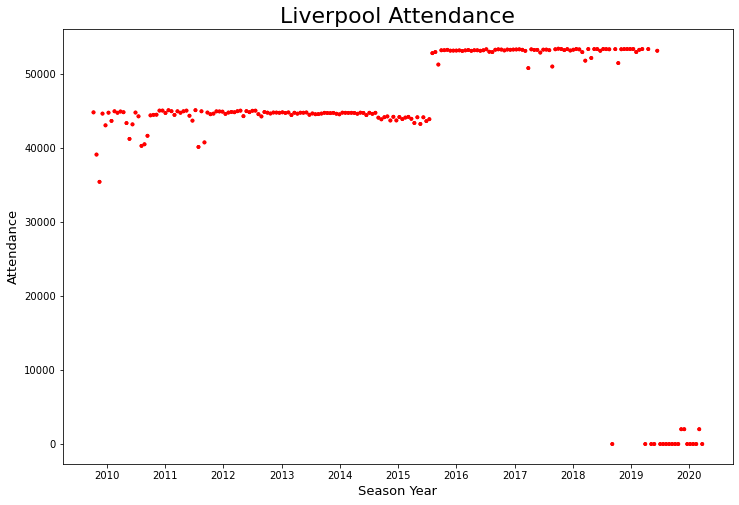

In [14]:
figure, ax2 = plt.subplots(figsize=(12, 8))

liverpool_home_date = []
for i in range(len(liverpool_home)):
    liverpool_home_date.append(date[liverpool_home[i]])
    
x = liverpool_home_date
y=[]
for i in range(len(liverpool_home)):
    y.append(attendance[liverpool_home[i]])
    
ax2.scatter(x, y,s=8,c=['r']*len(liverpool_home))

plt.title('Liverpool Attendance', fontsize = 22)
plt.xlabel('Season Year', fontsize = 13)
plt.ylabel('Attendance', fontsize = 13)
#plt.legend()

print(len(liverpool_home))

default_x_ticks = []
xaxis = [2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020]
for i in range(11):
        default_x_ticks.append(((204/10.5)*(i+1))-15)
        
#default_x_ticks = [0,1150]
plt.xticks(default_x_ticks, xaxis)

plt.tight_layout

plt.savefig('liverpool_attendance.png')

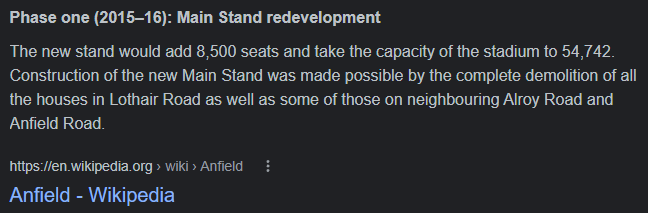

408


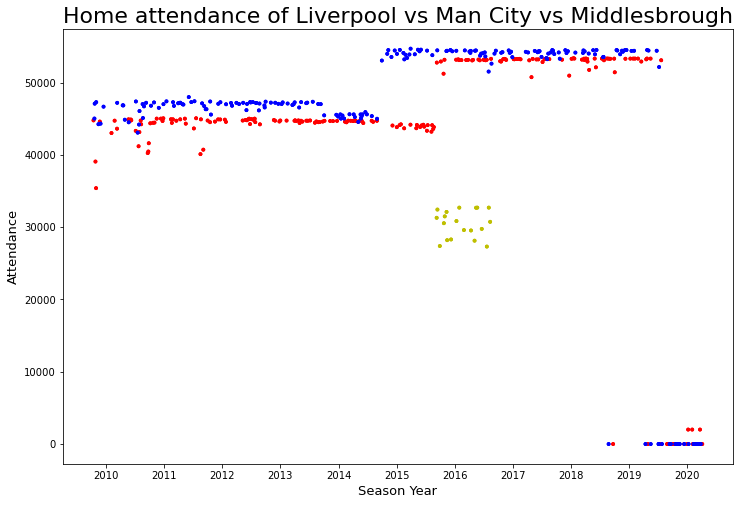

In [15]:
figure, ax2 = plt.subplots(figsize=(12, 8))

liverpool_home_date = []
for i in range(len(liverpool_home)):
    liverpool_home_date.append(date[liverpool_home[i]])

manchester_city_home_date = []
for i in range(len(manchester_city_home)):
    manchester_city_home_date.append(date[manchester_city_home[i]])
    
middlesbrough_home_date = []
for i in range(len(middlesbrough_home)):
    middlesbrough_home_date.append(date[middlesbrough_home[i]])
    
    
xliv = liverpool_home
yliv=[]
for i in range(len(liverpool_home)):
    yliv.append(attendance[liverpool_home[i]])
    
xmnc = manchester_city_home
ymnc=[]
for i in range(len(manchester_city_home)):
    ymnc.append(attendance[manchester_city_home[i]])
    
xmid = middlesbrough_home
ymid=[]
for i in range(len(middlesbrough_home)):
    ymid.append(attendance[middlesbrough_home[i]])

    
ax2.scatter(xliv, yliv,s=8,c=['r']*len(liverpool_home))
ax2.scatter(xmnc, ymnc,s=8,c=['b']*len(manchester_city_home))
ax2.scatter(xmid, ymid,s=8,c=['y']*len(middlesbrough_home))

plt.title('Home attendance of Liverpool vs Man City vs Middlesbrough', fontsize = 22)
plt.xlabel('Season Year', fontsize = 13)
plt.ylabel('Attendance', fontsize = 13)
#plt.legend()

print(len(liverpool_home))

default_x_ticks = []
xaxis = [2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020]
length = len(attendance)
for i in range(11):
        default_x_ticks.append(((length/10.5)*(i+1))-(length/13.5))
    
plt.xticks(default_x_ticks, xaxis)

plt.tight_layout

plt.savefig('liv_mnc_mid_attendance.png')

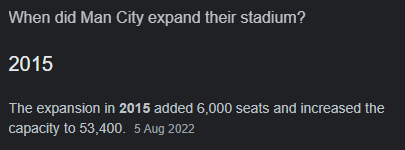

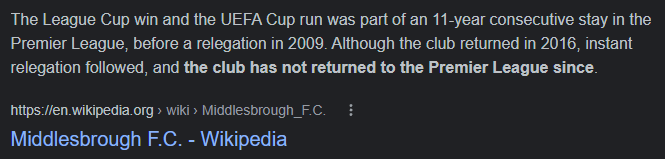

https://www.leeds.ac.uk/news-science/news/article/4894/how-empty-stadiums-affected-football-during-pandemic

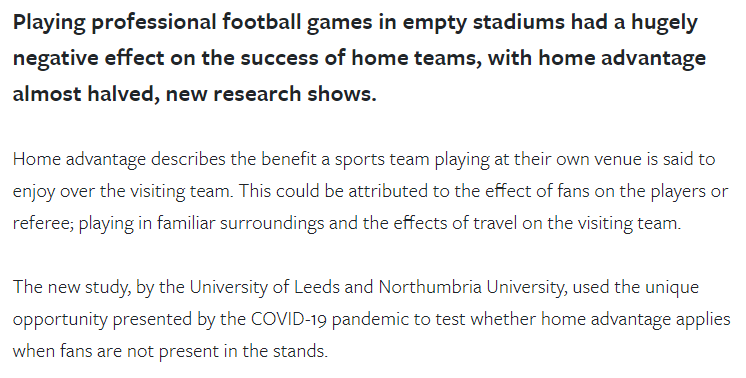

# Loading win data

In [16]:
column_name = ['match_winner']
df = pd.read_csv('EPL Workbook.csv', skipinitialspace=True, usecols=column_name)
winner_in_list = df.values.tolist()
winner = []
for i in range(len(winner_in_list)):
    winner.append(winner_in_list[i][0])

#HOME WINS

afc_bournemouth_home_wins = []
arsenal_home_wins = []
aston_villa_home_wins = []
birmingham_city_home_wins = []
blackburn_rovers_home_wins = []
blackpool_home_wins = []
bolton_wanderers_home_wins = []
brighton_and_hove_albion_home_wins = []
burnley_home_wins = []
cardiff_city_home_wins = []
chelsea_home_wins = []
crystal_palace_home_wins = []
everton_home_wins = []
fulham_home_wins = []
huddersfield_town_home_wins = []
hull_city_home_wins = []
leeds_united_home_wins = []
leicester_city_home_wins = []
liverpool_home_wins = []
manchester_city_home_wins = []
manchester_united_home_wins = []
middlesbrough_home_wins = []
newcastle_united_home_wins = []
norwich_city_home_wins = []
qpr_home_wins = []
reading_home_wins = []
sheffield_united_home_wins = []
southampton_home_wins = []
stoke_city_home_wins = []
sunderland_home_wins = []
swansea_city_home_wins = []
tottenham_hotspur_home_wins = []
watford_home_wins = []
west_bromwich_albion_home_wins = []
west_ham_united_home_wins = []
wigan_athletic_home_wins = []
wolverhampton_wanderers_home_wins = []

error = []

all_teams_home_wins = [afc_bournemouth_home_wins,arsenal_home_wins,aston_villa_home_wins,birmingham_city_home_wins,
             blackburn_rovers_home_wins,blackpool_home_wins,bolton_wanderers_home_wins,
             brighton_and_hove_albion_home_wins,burnley_home_wins,cardiff_city_home_wins,chelsea_home_wins,
             crystal_palace_home_wins,everton_home_wins,fulham_home_wins,huddersfield_town_home_wins,
             hull_city_home_wins,leeds_united_home_wins,leicester_city_home_wins,liverpool_home_wins,
             manchester_city_home_wins,manchester_united_home_wins,middlesbrough_home_wins,
             newcastle_united_home_wins,norwich_city_home_wins,qpr_home_wins,reading_home_wins,sheffield_united_home_wins,
             southampton_home_wins,stoke_city_home_wins,sunderland_home_wins,swansea_city_home_wins,
             tottenham_hotspur_home_wins,watford_home_wins,west_bromwich_albion_home_wins,west_ham_united_home_wins,
             wigan_athletic_home_wins,wolverhampton_wanderers_home_wins]



#AWAY WINS

afc_bournemouth_away_wins = []
arsenal_away_wins = []
aston_villa_away_wins = []
birmingham_city_away_wins = []
blackburn_rovers_away_wins = []
blackpool_away_wins = []
bolton_wanderers_away_wins = []
brighton_and_hove_albion_away_wins = []
burnley_away_wins = []
cardiff_city_away_wins = []
chelsea_away_wins = []
crystal_palace_away_wins = []
everton_away_wins = []
fulham_away_wins = []
huddersfield_town_away_wins = []
hull_city_away_wins = []
leeds_united_away_wins = []
leicester_city_away_wins = []
liverpool_away_wins = []
manchester_city_away_wins = []
manchester_united_away_wins = []
middlesbrough_away_wins = []
newcastle_united_away_wins = []
norwich_city_away_wins = []
qpr_away_wins = []
reading_away_wins = []
sheffield_united_away_wins = []
southampton_away_wins = []
stoke_city_away_wins = []
sunderland_away_wins = []
swansea_city_away_wins = []
tottenham_hotspur_away_wins = []
watford_away_wins = []
west_bromwich_albion_away_wins = []
west_ham_united_away_wins = []
wigan_athletic_away_wins = []
wolverhampton_wanderers_away_wins = []

error = []

all_teams_away_wins = [afc_bournemouth_away_wins,arsenal_away_wins,aston_villa_away_wins,birmingham_city_away_wins,
             blackburn_rovers_away_wins,blackpool_away_wins,bolton_wanderers_away_wins,
             brighton_and_hove_albion_away_wins,burnley_away_wins,cardiff_city_away_wins,chelsea_away_wins,
             crystal_palace_away_wins,everton_away_wins,fulham_away_wins,huddersfield_town_away_wins,
             hull_city_away_wins,leeds_united_away_wins,leicester_city_away_wins,liverpool_away_wins,
             manchester_city_away_wins,manchester_united_away_wins,middlesbrough_away_wins,
             newcastle_united_away_wins,norwich_city_away_wins,qpr_away_wins,reading_away_wins,sheffield_united_away_wins,
             southampton_away_wins,stoke_city_away_wins,sunderland_away_wins,swansea_city_away_wins,
             tottenham_hotspur_away_wins,watford_away_wins,west_bromwich_albion_away_wins,west_ham_united_away_wins,
             wigan_athletic_away_wins,wolverhampton_wanderers_away_wins]



#HOME LOSSES

afc_bournemouth_home_losses = []
arsenal_home_losses = []
aston_villa_home_losses = []
birmingham_city_home_losses = []
blackburn_rovers_home_losses = []
blackpool_home_losses = []
bolton_wanderers_home_losses = []
brighton_and_hove_albion_home_losses = []
burnley_home_losses = []
cardiff_city_home_losses = []
chelsea_home_losses = []
crystal_palace_home_losses = []
everton_home_losses = []
fulham_home_losses = []
huddersfield_town_home_losses = []
hull_city_home_losses = []
leeds_united_home_losses = []
leicester_city_home_losses = []
liverpool_home_losses = []
manchester_city_home_losses = []
manchester_united_home_losses = []
middlesbrough_home_losses = []
newcastle_united_home_losses = []
norwich_city_home_losses = []
qpr_home_losses = []
reading_home_losses = []
sheffield_united_home_losses = []
southampton_home_losses = []
stoke_city_home_losses = []
sunderland_home_losses = []
swansea_city_home_losses = []
tottenham_hotspur_home_losses = []
watford_home_losses = []
west_bromwich_albion_home_losses = []
west_ham_united_home_losses = []
wigan_athletic_home_losses = []
wolverhampton_wanderers_home_losses = []

error = []

all_teams_home_losses = [afc_bournemouth_home_losses,arsenal_home_losses,aston_villa_home_losses,birmingham_city_home_losses,
             blackburn_rovers_home_losses,blackpool_home_losses,bolton_wanderers_home_losses,
             brighton_and_hove_albion_home_losses,burnley_home_losses,cardiff_city_home_losses,chelsea_home_losses,
             crystal_palace_home_losses,everton_home_losses,fulham_home_losses,huddersfield_town_home_losses,
             hull_city_home_losses,leeds_united_home_losses,leicester_city_home_losses,liverpool_home_losses,
             manchester_city_home_losses,manchester_united_home_losses,middlesbrough_home_losses,
             newcastle_united_home_losses,norwich_city_home_losses,qpr_home_losses,reading_home_losses,sheffield_united_home_losses,
             southampton_home_losses,stoke_city_home_losses,sunderland_home_losses,swansea_city_home_losses,
             tottenham_hotspur_home_losses,watford_home_losses,west_bromwich_albion_home_losses,west_ham_united_home_losses,
             wigan_athletic_home_losses,wolverhampton_wanderers_home_losses]



#AWAY LOSSES

afc_bournemouth_away_losses = []
arsenal_away_losses = []
aston_villa_away_losses = []
birmingham_city_away_losses = []
blackburn_rovers_away_losses = []
blackpool_away_losses = []
bolton_wanderers_away_losses = []
brighton_and_hove_albion_away_losses = []
burnley_away_losses = []
cardiff_city_away_losses = []
chelsea_away_losses = []
crystal_palace_away_losses = []
everton_away_losses = []
fulham_away_losses = []
huddersfield_town_away_losses = []
hull_city_away_losses = []
leeds_united_away_losses = []
leicester_city_away_losses = []
liverpool_away_losses = []
manchester_city_away_losses = []
manchester_united_away_losses = []
middlesbrough_away_losses = []
newcastle_united_away_losses = []
norwich_city_away_losses = []
qpr_away_losses = []
reading_away_losses = []
sheffield_united_away_losses = []
southampton_away_losses = []
stoke_city_away_losses = []
sunderland_away_losses = []
swansea_city_away_losses = []
tottenham_hotspur_away_losses = []
watford_away_losses = []
west_bromwich_albion_away_losses = []
west_ham_united_away_losses = []
wigan_athletic_away_losses = []
wolverhampton_wanderers_away_losses = []

error = []

all_teams_away_losses = [afc_bournemouth_away_losses,arsenal_away_losses,aston_villa_away_losses,birmingham_city_away_losses,
             blackburn_rovers_away_losses,blackpool_away_losses,bolton_wanderers_away_losses,
             brighton_and_hove_albion_away_losses,burnley_away_losses,cardiff_city_away_losses,chelsea_away_losses,
             crystal_palace_away_losses,everton_away_losses,fulham_away_losses,huddersfield_town_away_losses,
             hull_city_away_losses,leeds_united_away_losses,leicester_city_away_losses,liverpool_away_losses,
             manchester_city_away_losses,manchester_united_away_losses,middlesbrough_away_losses,
             newcastle_united_away_losses,norwich_city_away_losses,qpr_away_losses,reading_away_losses,sheffield_united_away_losses,
             southampton_away_losses,stoke_city_away_losses,sunderland_away_losses,swansea_city_away_losses,
             tottenham_hotspur_away_losses,watford_away_losses,west_bromwich_albion_away_losses,west_ham_united_away_losses,
             wigan_athletic_away_losses,wolverhampton_wanderers_away_losses]

#HOME draws

afc_bournemouth_home_draws = []
arsenal_home_draws = []
aston_villa_home_draws = []
birmingham_city_home_draws = []
blackburn_rovers_home_draws = []
blackpool_home_draws = []
bolton_wanderers_home_draws = []
brighton_and_hove_albion_home_draws = []
burnley_home_draws = []
cardiff_city_home_draws = []
chelsea_home_draws = []
crystal_palace_home_draws = []
everton_home_draws = []
fulham_home_draws = []
huddersfield_town_home_draws = []
hull_city_home_draws = []
leeds_united_home_draws = []
leicester_city_home_draws = []
liverpool_home_draws = []
manchester_city_home_draws = []
manchester_united_home_draws = []
middlesbrough_home_draws = []
newcastle_united_home_draws = []
norwich_city_home_draws = []
qpr_home_draws = []
reading_home_draws = []
sheffield_united_home_draws = []
southampton_home_draws = []
stoke_city_home_draws = []
sunderland_home_draws = []
swansea_city_home_draws = []
tottenham_hotspur_home_draws = []
watford_home_draws = []
west_bromwich_albion_home_draws = []
west_ham_united_home_draws = []
wigan_athletic_home_draws = []
wolverhampton_wanderers_home_draws = []

error = []

all_teams_home_draws = [afc_bournemouth_home_draws,arsenal_home_draws,aston_villa_home_draws,birmingham_city_home_draws,
             blackburn_rovers_home_draws,blackpool_home_draws,bolton_wanderers_home_draws,
             brighton_and_hove_albion_home_draws,burnley_home_draws,cardiff_city_home_draws,chelsea_home_draws,
             crystal_palace_home_draws,everton_home_draws,fulham_home_draws,huddersfield_town_home_draws,
             hull_city_home_draws,leeds_united_home_draws,leicester_city_home_draws,liverpool_home_draws,
             manchester_city_home_draws,manchester_united_home_draws,middlesbrough_home_draws,
             newcastle_united_home_draws,norwich_city_home_draws,qpr_home_draws,reading_home_draws,sheffield_united_home_draws,
             southampton_home_draws,stoke_city_home_draws,sunderland_home_draws,swansea_city_home_draws,
             tottenham_hotspur_home_draws,watford_home_draws,west_bromwich_albion_home_draws,west_ham_united_home_draws,
             wigan_athletic_home_draws,wolverhampton_wanderers_home_draws]



#AWAY draws

afc_bournemouth_away_draws = []
arsenal_away_draws = []
aston_villa_away_draws = []
birmingham_city_away_draws = []
blackburn_rovers_away_draws = []
blackpool_away_draws = []
bolton_wanderers_away_draws = []
brighton_and_hove_albion_away_draws = []
burnley_away_draws = []
cardiff_city_away_draws = []
chelsea_away_draws = []
crystal_palace_away_draws = []
everton_away_draws = []
fulham_away_draws = []
huddersfield_town_away_draws = []
hull_city_away_draws = []
leeds_united_away_draws = []
leicester_city_away_draws = []
liverpool_away_draws = []
manchester_city_away_draws = []
manchester_united_away_draws = []
middlesbrough_away_draws = []
newcastle_united_away_draws = []
norwich_city_away_draws = []
qpr_away_draws = []
reading_away_draws = []
sheffield_united_away_draws = []
southampton_away_draws = []
stoke_city_away_draws = []
sunderland_away_draws = []
swansea_city_away_draws = []
tottenham_hotspur_away_draws = []
watford_away_draws = []
west_bromwich_albion_away_draws = []
west_ham_united_away_draws = []
wigan_athletic_away_draws = []
wolverhampton_wanderers_away_draws = []

error = []

all_teams_away_draws = [afc_bournemouth_away_draws,arsenal_away_draws,aston_villa_away_draws,birmingham_city_away_draws,
             blackburn_rovers_away_draws,blackpool_away_draws,bolton_wanderers_away_draws,
             brighton_and_hove_albion_away_draws,burnley_away_draws,cardiff_city_away_draws,chelsea_away_draws,
             crystal_palace_away_draws,everton_away_draws,fulham_away_draws,huddersfield_town_away_draws,
             hull_city_away_draws,leeds_united_away_draws,leicester_city_away_draws,liverpool_away_draws,
             manchester_city_away_draws,manchester_united_away_draws,middlesbrough_away_draws,
             newcastle_united_away_draws,norwich_city_away_draws,qpr_away_draws,reading_away_draws,sheffield_united_away_draws,
             southampton_away_draws,stoke_city_away_draws,sunderland_away_draws,swansea_city_away_draws,
             tottenham_hotspur_away_draws,watford_away_draws,west_bromwich_albion_away_draws,west_ham_united_away_draws,
             wigan_athletic_away_draws,wolverhampton_wanderers_away_draws]


def win_check(winner,away,home):
    for i in range(4070):
        if winner[i] == 'H':
            all_teams_home_wins[dictionary[home[i]][0]].append(i)
            all_teams_away_losses[dictionary[away[i]][0]].append(i)
        elif winner[i] == 'A':
            all_teams_away_wins[dictionary[away[i]][0]].append(i)
            all_teams_home_losses[dictionary[home[i]][0]].append(i)
        elif winner[i] == 'D':
            all_teams_home_draws[dictionary[home[i]][0]].append(i)
            all_teams_away_draws[dictionary[away[i]][0]].append(i)
        else:
            error.append(i)
            

win_check(winner,away,home)
    
percentage_total = 0
percentage_list = []
home_wl_total = 0
home_win_loss_ratio = []
for i in range(len(all_team_names)):
    print(all_team_names[i],'team statistics')
    print('Home wins: ',len(all_teams_home_wins[i]))
    print('Home losses: ',len(all_teams_home_losses[i]))
    print('Home draws: ',len(all_teams_home_draws[i]))
    print('Away wins: ',len(all_teams_away_wins[i]))
    print('Away losses: ',len(all_teams_away_losses[i]))
    print('Away draws: ',len(all_teams_away_draws[i]))
    print()
    print('Total matches: ',len(all_teams[i]))
    print()
    percentage = ((len(all_teams_home_wins[i]))/(len(all_teams_home_wins[i])+len(all_teams_away_wins[i])))*100
    percentage_total += percentage
    percentage_list.append(percentage)
    
    home_wl = ((len(all_teams_home_wins[i]))/(len(all_teams_home_wins[i])+len(all_teams_home_losses[i])))*100
    home_wl_total += home_wl
    home_win_loss_ratio.append(home_wl)
    print('Percentage of home wins out of total wins: ',percentage,'%')
    print('Percentage of home wins out of home games: ',home_wl,'%')
    print()
    print()

percentage_avg = percentage_total/len(all_team_names)
print('The average win percentage is: ',percentage_avg)

np.savetxt("home_win_percentage.csv", home_win_loss_ratio, delimiter =", ", fmt ='% s')

AFC Bournemouth team statistics
Home wins:  34
Home losses:  36
Home draws:  25
Away wins:  22
Away losses:  54
Away draws:  18

Total matches:  190

Percentage of home wins out of total wins:  60.71428571428571 %
Percentage of home wins out of home games:  48.57142857142857 %


Arsenal team statistics
Home wins:  129
Home losses:  30
Home draws:  44
Away wins:  86
Away losses:  69
Away draws:  49

Total matches:  406

Percentage of home wins out of total wins:  60.0 %
Percentage of home wins out of home games:  81.13207547169812 %


Aston Villa team statistics
Home wins:  42
Home losses:  65
Home draws:  38
Away wins:  31
Away losses:  78
Away draws:  38

Total matches:  290

Percentage of home wins out of total wins:  57.534246575342465 %
Percentage of home wins out of home games:  39.25233644859813 %


Birmingham City team statistics
Home wins:  6
Home losses:  5
Home draws:  8
Away wins:  2
Away losses:  10
Away draws:  7

Total matches:  38

Percentage of home wins out of total wi

# Creating dictionary

In [17]:
dictionary = {}
for i in range(len(all_teams)):
    dictionary[all_team_names[i]] = [i]
    dictionary[all_team_names[i]+' Game Numbers'] = all_teams[i]
    dictionary[all_team_names[i]+' Home Game Numbers'] = all_teams_home[i]
    dictionary[all_team_names[i]+' Away Game Numbers'] = all_teams_away[i]
    dictionary[all_team_names[i]+' Attendance'] = attendance[i]
    #dictionary[all_team_names[i]+' Winner'] = winner[i]

    
print(dictionary)

{'AFC Bournemouth': [0], 'AFC Bournemouth Game Numbers': [1924, 1924, 1930, 1930, 1940, 1940, 1959, 1959, 1987, 1987, 1994, 1994, 2024, 2024, 2042, 2042, 2066, 2066, 2072, 2072, 2080, 2080, 2124, 2124, 2131, 2131, 2138, 2138, 2179, 2179, 2202, 2202, 2225, 2225, 2237, 2237, 2243, 2243, 2289, 2289, 2335, 2335, 2350, 2350, 2360, 2360, 2380, 2380, 2398, 2398, 2420, 2420, 2427, 2427, 2431, 2431, 2439, 2439, 2508, 2508, 2513, 2513, 2519, 2519, 2536, 2536, 2547, 2547, 2597, 2597, 2614, 2614, 2620, 2620, 2623, 2623, 2660, 2660, 2741, 2741, 2745, 2745, 2753, 2753, 2802, 2802, 2815, 2815, 2828, 2828, 2835, 2835, 2849, 2849, 2856, 2856, 2877, 2877, 2883, 2883, 2918, 2918, 2932, 2932, 2938, 2938, 2965, 2965, 2996, 2996, 3019, 3019, 3021, 3021, 3050, 3050, 3085, 3085, 3111, 3111, 3118, 3118, 3127, 3127, 3142, 3142, 3149, 3149, 3155, 3155, 3163, 3163, 3179, 3179, 3190, 3190, 3222, 3222, 3236, 3236, 3241, 3241, 3250, 3250, 3325, 3325, 3378, 3378, 3382, 3382, 3408, 3408, 3448, 3448, 3456, 3456, 3505, 

# Plotting home-win percentage

408


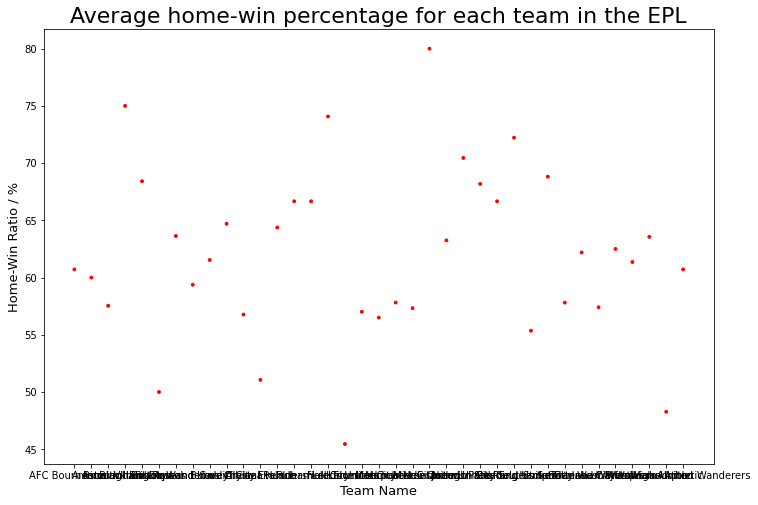

In [18]:
figure, ax2 = plt.subplots(figsize=(12, 8))

x = all_team_names
y = percentage_list
ax2.scatter(x,y,s=8,c=['r']*len(x))

plt.title('Average home-win percentage for each team in the EPL', fontsize = 22)
plt.xlabel('Team Name', fontsize = 13)
plt.ylabel('Home-Win Ratio / %', fontsize = 13)
#plt.legend()

print(len(liverpool_home))

'''default_x_ticks = []
xaxis = [2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020]
length = len(attendance)
for i in range(11):
        default_x_ticks.append(((length/10.5)*(i+1))-(length/13.5))'''
    
#plt.xticks(default_x_ticks, xaxis)

plt.savefig('win_ratio_average.png')

In [19]:
afc_bournemouth_home_attendance = []
arsenal_home_attendance = []
aston_villa_home_attendance = []
birmingham_city_home_attendance = []
blackburn_rovers_home_attendance = []
blackpool_home_attendance = []
bolton_wanderers_home_attendance = []
brighton_and_hove_albion_home_attendance = []
burnley_home_attendance = []
cardiff_city_home_attendance = []
chelsea_home_attendance = []
crystal_palace_home_attendance = []
everton_home_attendance = []
fulham_home_attendance = []
huddersfield_town_home_attendance = []
hull_city_home_attendance = []
leeds_united_home_attendance = []
leicester_city_home_attendance = []
liverpool_home_attendance = []
manchester_city_home_attendance = []
manchester_united_home_attendance = []
middlesbrough_home_attendance = []
newcastle_united_home_attendance = []
norwich_city_home_attendance = []
qpr_home_attendance = []
reading_home_attendance = []
sheffield_united_home_attendance = []
southampton_home_attendance = []
stoke_city_home_attendance = []
sunderland_home_attendance = []
swansea_city_home_attendance = []
tottenham_hotspur_home_attendance = []
watford_home_attendance = []
west_bromwich_albion_home_attendance = []
west_ham_united_home_attendance = []
wigan_athletic_home_attendance = []
wolverhampton_wanderers_home_attendance = []

error = []

all_teams_home_attendance = [afc_bournemouth_home_attendance,arsenal_home_attendance,aston_villa_home_attendance,birmingham_city_home_attendance,
             blackburn_rovers_home_attendance,blackpool_home_attendance,bolton_wanderers_home_attendance,
             brighton_and_hove_albion_home_attendance,burnley_home_attendance,cardiff_city_home_attendance,chelsea_home_attendance,
             crystal_palace_home_attendance,everton_home_attendance,fulham_home_attendance,huddersfield_town_home_attendance,
             hull_city_home_attendance,leeds_united_home_attendance,leicester_city_home_attendance,liverpool_home_attendance,
             manchester_city_home_attendance,manchester_united_home_attendance,middlesbrough_home_attendance,
             newcastle_united_home_attendance,norwich_city_home_attendance,qpr_home_attendance,reading_home_attendance,sheffield_united_home_attendance,
             southampton_home_attendance,stoke_city_home_attendance,sunderland_home_attendance,swansea_city_home_attendance,
             tottenham_hotspur_home_attendance,watford_home_attendance,west_bromwich_albion_home_attendance,west_ham_united_home_attendance,
             wigan_athletic_home_attendance,wolverhampton_wanderers_home_attendance]
            
def attendance_check_home(attendance,home,team):
    for i in range(4070):
        if home[i] == team:
            all_teams_home_attendance[dictionary[team][0]].append(attendance[i])
        else:
            error.append(i)
            
for i in range(len(all_team_names)):
    team = all_team_names[i]
    attendance_check_home(attendance,home,team)
    
attendance_avg = []
for i in range(len(all_team_names)):
    attendance_running_total = 0
    for j in range(len(all_teams_home_attendance[i])):
        attendance_running_total += all_teams_home_attendance[i][j]
    attendance_avg.append(attendance_running_total/len(all_teams_home_attendance[i]))

In [20]:
for i in range(len(percentage_list)):
    print(attendance_avg[i])
    print(percentage_list[i])

10257.652631578947
60.71428571428571
54933.945812807884
60.0
31256.337931034483
57.534246575342465
25461.842105263157
75.0
23775.5
68.42105263157895
15779.736842105263
50.0
23269.92105263158
63.63636363636363
22320.309859154928
59.375
16738.354545454546
61.53846153846154
29418.842105263157
64.70588235294117
37837.487684729065
56.76855895196506
21945.5
51.06382978723404
34264.79802955665
64.375
21821.02752293578
66.66666666666666
23617.21052631579
66.66666666666666
22811.701754385966
74.07407407407408
0.0
45.45454545454545
27588.110236220473
57.009345794392516
43221.18137254902
56.502242152466366
45016.29756097561
57.81818181818181
68701.91625615764
57.327586206896555
30449.42105263158
80.0
45160.358695652176
63.24786324786324
25393.58947368421
70.45454545454545
17627.894736842107
68.18181818181817
23862.0
66.66666666666666
13618.5
72.22222222222221
27405.59393939394
55.35714285714286
27285.190789473683
68.81720430107528
41179.38345864662
57.8125
20461.556390977443
62.19512195121951
386

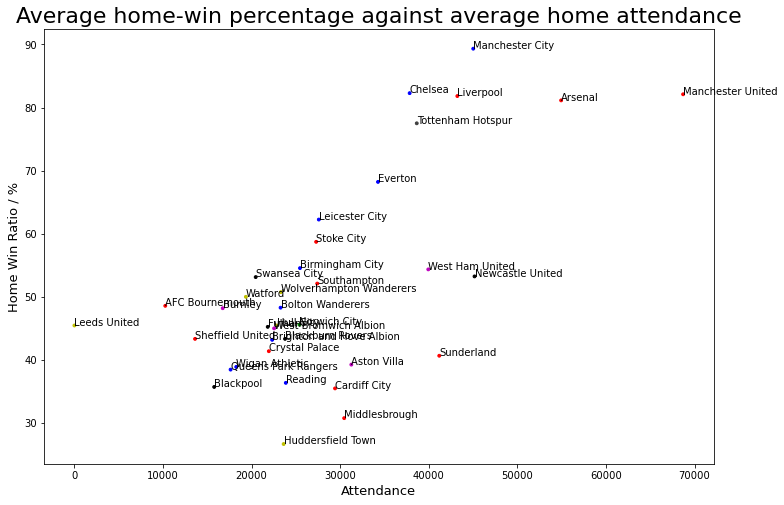

In [21]:
figure, ax2 = plt.subplots(figsize=(12, 8))

x = attendance_avg
#y = percentage_list
y = home_win_loss_ratio



colour_list = ['r','r','m','b','k','k','b','b','m','r','b','r','b','k','y','y','y','b','r','b','r','r','k','g','b','b','r','r','r','r','k','0.25','y','m','m','b','y']
ax2.scatter(x,y,s=8,c=colour_list)

plt.title('Average home-win percentage against average home attendance', fontsize = 22)
plt.xlabel('Attendance', fontsize = 13)
plt.ylabel('Home Win Ratio / %', fontsize = 13)

n = all_team_names
for i, txt in enumerate(n):
    plt.annotate(txt, (x[i], y[i]))

plt.tight_layout


plt.savefig('win_vs_attendance.png')

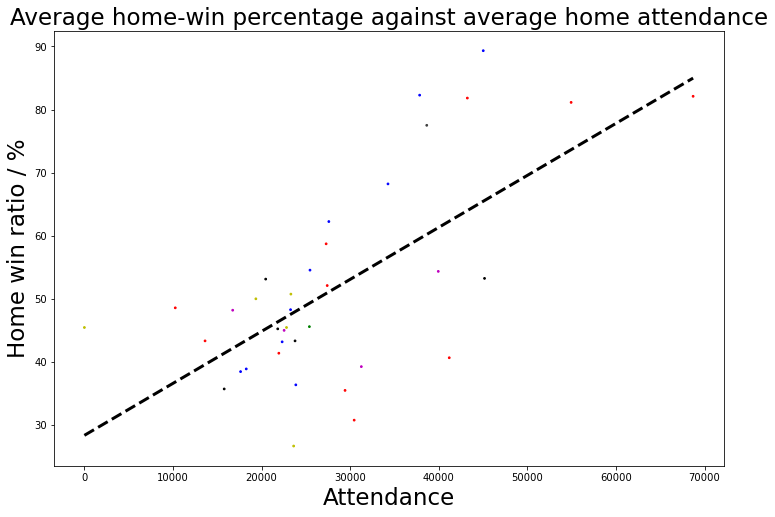

In [68]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

figure, ax2 = plt.subplots(figsize=(12, 8))

x = attendance_avg
y = home_win_loss_ratio
colour_list = ['r','r','m','b','k','k','b','b','m','r','b','r','b','k','y','y','y','b','r','b','r','r','k','g','b','b','r','r','r','r','k','0.25','y','m','m','b','y']
ax2.scatter(x,y,s=3,c=colour_list)

best_fit = [[0,68701],[28.36,84.98]]
ax2.plot(best_fit[0],best_fit[1],c='k',linestyle = '--',linewidth=3)

plt.title('Average home-win percentage against average home attendance', fontsize = 23)
plt.xlabel('Attendance', fontsize = 23)
plt.ylabel('Home win ratio / %', fontsize = 23)

#n = all_team_names
#for i, txt in enumerate(n):
#    plt.annotate(txt, (x[i], y[i]))

plt.savefig('win_vs_attendance_bestfit.png')

'def getImage(path):\n   return OffsetImage(plt.imread(path, format="jpg"), zoom=.001)\n\npaths = []\nfor i in range(len(all_team_names)):\n    paths.append(all_team_names[i]+\'.png\')\n\n#fig, ax = plt.subplots()\nfor x0, y0, path in zip(x, y, paths):\n   ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False)\n   ax2.add_artist(ab)'

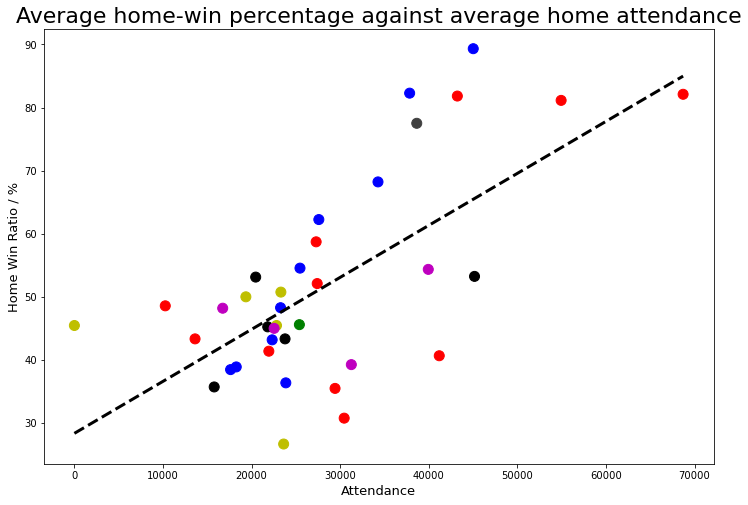

In [23]:
#from matplotlib.offsetbox import OffsetImage, AnnotationBbox

figure, ax2 = plt.subplots(figsize=(12, 8))

x = attendance_avg
y = home_win_loss_ratio
colour_list = ['r','r','m','b','k','k','b','b','m','r','b','r','b','k','y','y','y','b','r','b','r','r','k','g','b','b','r','r','r','r','k','0.25','y','m','m','b','y']
ax2.scatter(x,y,s=100,c=colour_list)

best_fit = [[0,68701],[28.36,84.98]]
ax2.plot(best_fit[0],best_fit[1],c='k',linestyle = '--',linewidth=3)

plt.title('Average home-win percentage against average home attendance', fontsize = 22)
plt.xlabel('Attendance', fontsize = 13)
plt.ylabel('Home Win Ratio / %', fontsize = 13)

#n = all_team_names
#for i, txt in enumerate(n):
#    plt.annotate(txt, (x[i], y[i]))

plt.savefig('win_vs_attendance_bestfit_largeicon.png')

'''def getImage(path):
   return OffsetImage(plt.imread(path, format="jpg"), zoom=.001)

paths = []
for i in range(len(all_team_names)):
    paths.append(all_team_names[i]+'.png')

#fig, ax = plt.subplots()
for x0, y0, path in zip(x, y, paths):
   ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False)
   ax2.add_artist(ab)'''

In [24]:
for i in range(len(all_team_names)):
    print(int(attendance_avg[i]))
print()
for i in range(len(all_team_names)):
    print(int(home_win_loss_ratio[i]))

10257
54933
31256
25461
23775
15779
23269
22320
16738
29418
37837
21945
34264
21821
23617
22811
0
27588
43221
45016
68701
30449
45160
25393
17627
23862
13618
27405
27285
41179
20461
38640
19352
22541
39940
18268
23305

48
81
39
54
43
35
48
43
48
35
82
41
68
45
26
45
45
62
81
89
82
30
53
45
38
36
43
52
58
40
53
77
50
45
54
38
50


In [25]:
home_fans = []
home_fan_percentage = []
for i in range(len(all_team_names)):
    if attendance_avg[i] < 30001 and attendance_avg[i] > 0:
        home_fans.append(attendance_avg[i]-3000)
        home_fan_percentage.append(((attendance_avg[i]-3000)/attendance_avg[i])*100)
    elif attendance_avg[i] > 30000:
        home_fans.append(attendance_avg[i]*0.9)
        home_fan_percentage.append(90)
    else:
        home_fans.append(0)
        home_fan_percentage.append(0)
        
print(attendance_avg)
print(home_fans)

[10257.652631578947, 54933.945812807884, 31256.337931034483, 25461.842105263157, 23775.5, 15779.736842105263, 23269.92105263158, 22320.309859154928, 16738.354545454546, 29418.842105263157, 37837.487684729065, 21945.5, 34264.79802955665, 21821.02752293578, 23617.21052631579, 22811.701754385966, 0.0, 27588.110236220473, 43221.18137254902, 45016.29756097561, 68701.91625615764, 30449.42105263158, 45160.358695652176, 25393.58947368421, 17627.894736842107, 23862.0, 13618.5, 27405.59393939394, 27285.190789473683, 41179.38345864662, 20461.556390977443, 38640.275862068964, 19352.926315789475, 22541.239520958083, 39940.95652173913, 18268.35087719298, 23305.25842696629]
[7257.652631578947, 49440.5512315271, 28130.704137931036, 22461.842105263157, 20775.5, 12779.736842105263, 20269.92105263158, 19320.309859154928, 13738.354545454546, 26418.842105263157, 34053.73891625616, 18945.5, 30838.318226600986, 18821.02752293578, 20617.21052631579, 19811.701754385966, 0, 24588.110236220473, 38899.06323529412

(70.0, 91.0)

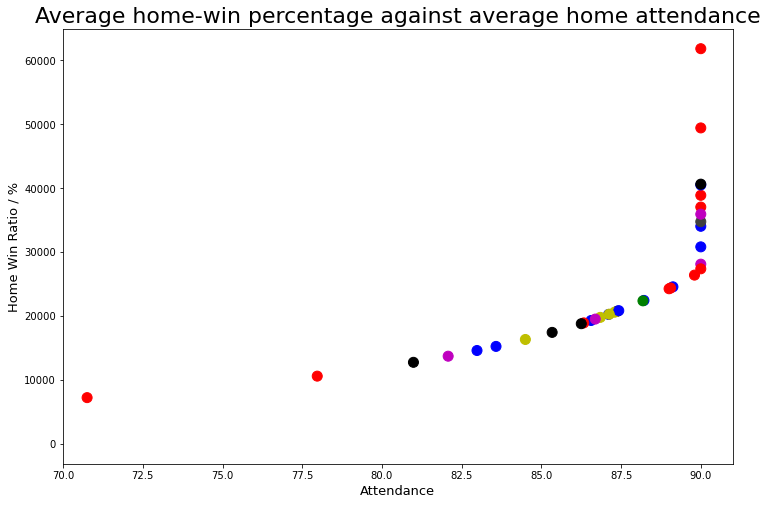

In [26]:
figure, ax2 = plt.subplots(figsize=(12, 8))

x = home_fan_percentage
#y = home_win_loss_ratio
y = home_fans
colour_list = ['r','r','m','b','k','k','b','b','m','r','b','r','b','k','y','y','y','b','r','b','r','r','k','g','b','b','r','r','r','r','k','0.25','y','m','m','b','y']
ax2.scatter(x,y,s=100,c=colour_list)

#best_fit = [[0,68701],[28.36,84.98]]
#ax2.plot(best_fit[0],best_fit[1],c='k',linestyle = '--',linewidth=3)

plt.title('Average home-win percentage against average home attendance', fontsize = 22)
plt.xlabel('Attendance', fontsize = 13)
plt.ylabel('Home Win Ratio / %', fontsize = 13)

plt.xlim(70,91)

next, plot the covid year, all teams normal win percentage vs covid percentage

# Covid Year

In [27]:
#testing greater than and less than for dates in python
import time

print(date[0])
print(date[1])
if date[0] > '2010-10-01':
    print('yes')
if date[1] > date[0]:
    print('no')

2010-11-01
2011-04-11
yes
no


In [28]:
covid_date_values = []
for i in range(len(date)):
    if date[i] > '2020-03-13':
        covid_date_values.append(i)

#for i in range(len(covid_date_values)):
    #print(attendance[covid_date_values[i]])

In [34]:
covid_team_names = ['AFC Bournemouth','Arsenal','Aston Villa','Brighton and Hove Albion',
                    'Burnley','Chelsea','Crystal Palace','Everton','Fulham','Leeds United',
                    'Leicester City','Liverpool','Manchester City','Manchester United',
                    'Newcastle United','Norwich City','Sheffield United','Southampton',
                    'Tottenham Hotspur','Watford','West Bromwich Albion','West Ham United',
                    'Wolverhampton Wanderers']

covid_team_abvs = ['BOU','ARS','AST','BHA','BUR','CHE','PAL','EVE','FUL','LEE','LEI','LIV',
                  'MNC','MNU','NEW','NOR','SHU','SOU','TOT','WAT','WBA','WHU','WOL']

In [35]:
column_name = ['home_team']
df = pd.read_csv('EPL_covid.csv', skipinitialspace=True, usecols=column_name)
home_team_covid_in_list = df.values.tolist()
home_team_covid_from_file = []
for i in range(len(home_team_covid_in_list)):
    home_team_covid_from_file.append(home_team_covid_in_list[i][0])

home_team_covid = []
for i in range(len(home_team_covid_from_file)):
    home_team_covid.append(home_team_covid_from_file[i])
    
    
column_name = ['match_winner']
df = pd.read_csv('EPL_covid.csv', skipinitialspace=True, usecols=column_name)
winner_covid_in_list = df.values.tolist()
winner_covid_from_file = []
for i in range(len(winner_covid_in_list)):
    winner_covid_from_file.append(winner_covid_in_list[i][0])

winner_covid = []
for i in range(len(winner_covid_from_file)):
    winner_covid.append(winner_covid_from_file[i])

In [36]:
covid_name_values = []
for i in range(len(all_team_names)):
    for j in range(len(covid_team_names)):
        if covid_team_names[j] == all_team_names[i]:
            covid_name_values.append(i)
            
afc_bournemouth_covid_home_wins = []
arsenal_covid_home_wins = []
aston_villa_covid_home_wins = []
birmingham_city_covid_home_wins = []
blackburn_rovers_covid_home_wins = []
blackpool_covid_home_wins = []
bolton_wanderers_covid_home_wins = []
brighton_and_hove_albion_covid_home_wins = []
burnley_covid_home_wins = []
cardiff_city_covid_home_wins = []
chelsea_covid_home_wins = []
crystal_palace_covid_home_wins = []
everton_covid_home_wins = []
fulham_covid_home_wins = []
huddersfield_town_covid_home_wins = []
hull_city_covid_home_wins = []
leeds_united_covid_home_wins = []
leicester_city_covid_home_wins = []
liverpool_covid_home_wins = []
manchester_city_covid_home_wins = []
manchester_united_covid_home_wins = []
middlesbrough_covid_home_wins = []
newcastle_united_covid_home_wins = []
norwich_city_covid_home_wins = []
qpr_covid_home_wins = []
reading_covid_home_wins = []
sheffield_united_covid_home_wins = []
southampton_covid_home_wins = []
stoke_city_covid_home_wins = []
sunderland_covid_home_wins = []
swansea_city_covid_home_wins = []
tottenham_hotspur_covid_home_wins = []
watford_covid_home_wins = []
west_bromwich_albion_covid_home_wins = []
west_ham_united_covid_home_wins = []
wigan_athletic_covid_home_wins = []
wolverhampton_wanderers_covid_home_wins = []

error = []

all_teams_covid_home_wins = [afc_bournemouth_covid_home_wins,arsenal_covid_home_wins,aston_villa_covid_home_wins,birmingham_city_covid_home_wins,
             blackburn_rovers_covid_home_wins,blackpool_covid_home_wins,bolton_wanderers_covid_home_wins,
             brighton_and_hove_albion_covid_home_wins,burnley_covid_home_wins,cardiff_city_covid_home_wins,chelsea_covid_home_wins,
             crystal_palace_covid_home_wins,everton_covid_home_wins,fulham_covid_home_wins,huddersfield_town_covid_home_wins,
             hull_city_covid_home_wins,leeds_united_covid_home_wins,leicester_city_covid_home_wins,liverpool_covid_home_wins,
             manchester_city_covid_home_wins,manchester_united_covid_home_wins,middlesbrough_covid_home_wins,
             newcastle_united_covid_home_wins,norwich_city_covid_home_wins,qpr_covid_home_wins,reading_covid_home_wins,sheffield_united_covid_home_wins,
             southampton_covid_home_wins,stoke_city_covid_home_wins,sunderland_covid_home_wins,swansea_city_covid_home_wins,
             tottenham_hotspur_covid_home_wins,watford_covid_home_wins,west_bromwich_albion_covid_home_wins,west_ham_united_covid_home_wins,
             wigan_athletic_covid_home_wins,wolverhampton_wanderers_covid_home_wins]


In [37]:
covid_home_win_ratio = []
covid_home_wins = []
covid_home_losses = []
for i in range(len(covid_team_names)):
    home_wins_counter = []
    home_losses_counter = []
    for j in range(len(home_team_covid)):
        if home_team_covid[j] == covid_team_names[i] and winner_covid[j] == 'H':
            home_wins_counter.append('W')
        elif home_team_covid[j] == covid_team_names[i] and winner_covid[j] == 'A':
            home_losses_counter.append('L')
    covid_home_wins.append(len(home_wins_counter))
    covid_home_losses.append(len(home_losses_counter))

for i in range(len(covid_team_names)):
    covid_home_win_ratio.append((covid_home_wins[i]/(covid_home_losses[i]+covid_home_wins[i]))*100)

print(covid_home_win_ratio)

[0.0, 41.66666666666667, 64.28571428571429, 46.15384615384615, 41.17647058823529, 46.15384615384615, 42.857142857142854, 63.63636363636363, 60.0, 42.857142857142854, 53.333333333333336, 46.666666666666664, 55.55555555555556, 25.0, 62.5, 25.0, 36.84210526315789, 53.84615384615385, 69.23076923076923, 50.0, 72.72727272727273, 55.55555555555556, 54.54545454545454]


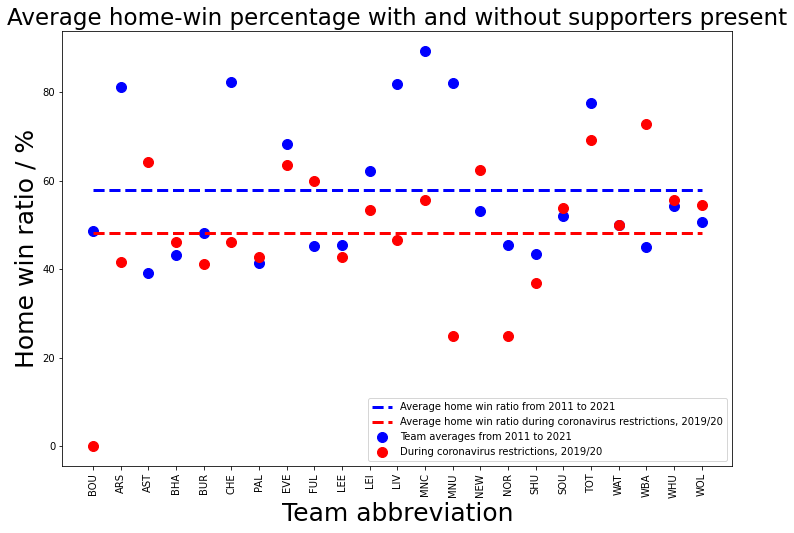

In [65]:
figure, ax2 = plt.subplots(figsize=(12, 8))

x = covid_team_abvs
y1 = []
for i in range(len(covid_team_names)):
    y1.append(home_win_loss_ratio[covid_name_values[i]])
y2 = covid_home_win_ratio




'''!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

pre_covid_avg = ...
covid_avg = ...
plot line for each of the above and compare results

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!'''




#colour_list = ['r','r','m','b','k','k','b','b','m','r','b','r','b','k','y','y','y','b','r','b','r','r','k','g','b','b','r','r','r','r','k','0.25','y','m','m','b','y']
ax2.scatter(x,y1,s=100,label='Team averages from 2011 to 2021',c='b')
ax2.scatter(x,y2,s=100,label='During coronavirus restrictions, 2019/20',c='r')

total_pre_covid = 0
total_during_covid = 0
for i in range(len(covid_team_abvs)):
    total_pre_covid += y1[i]
    total_during_covid += y2[i]
avg_pre_covid = total_pre_covid/len(y1)
avg_during_covid = total_during_covid/len(y2)

y3 = [avg_pre_covid]*len(y1)
y4 = [avg_during_covid]*len(y2)

ax2.plot(x,y3,c='b',label='Average home win ratio from 2011 to 2021',linestyle = '--',linewidth=3)
ax2.plot(x,y4,c='r',label='Average home win ratio during coronavirus restrictions, 2019/20',linestyle = '--',linewidth=3)

ax2.legend()

plt.xticks(rotation = 90)

#best_fit = [[0,68701],[28.36,84.98]]
#ax2.plot(best_fit[0],best_fit[1],c='k',linestyle = '--',linewidth=3)

plt.title('Average home-win percentage with and without supporters present', fontsize = 23)
plt.xlabel('Team abbreviation', fontsize = 25)
plt.ylabel('Home win ratio / %', fontsize = 25)

plt.tight_layout

plt.savefig('win_percentage_vs_no_crowd.png')

In [72]:
for i in range(len(y1)):
    print(y2[i])

0.0
41.66666666666667
64.28571428571429
46.15384615384615
41.17647058823529
46.15384615384615
42.857142857142854
63.63636363636363
60.0
42.857142857142854
53.333333333333336
46.666666666666664
55.55555555555556
25.0
62.5
25.0
36.84210526315789
53.84615384615385
69.23076923076923
50.0
72.72727272727273
55.55555555555556
54.54545454545454


In [70]:
print(y2)

[0.0, 41.66666666666667, 64.28571428571429, 46.15384615384615, 41.17647058823529, 46.15384615384615, 42.857142857142854, 63.63636363636363, 60.0, 42.857142857142854, 53.333333333333336, 46.666666666666664, 55.55555555555556, 25.0, 62.5, 25.0, 36.84210526315789, 53.84615384615385, 69.23076923076923, 50.0, 72.72727272727273, 55.55555555555556, 54.54545454545454]


In [73]:
print(avg_pre_covid,avg_during_covid)

57.83627756622185 48.24304608360336


Carrying out a T-test assuming equal variance, showed a statistical difference between the win percentage before and during covid with 95% confidence

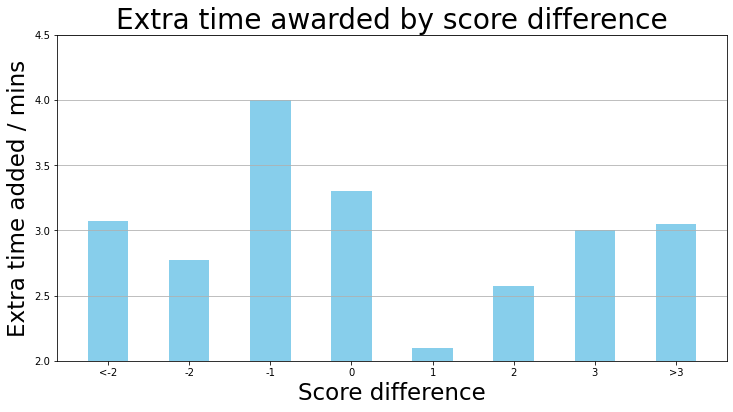

In [98]:
figure, ax2 = plt.subplots(figsize=(12, 6))

score_margin = ['<-2','-2','-1','0','1','2','3','>3']
minutes_added = [3.07,2.77,4.0,3.3,2.1,2.57,3.0,3.05]
ax2.bar(score_margin, minutes_added, color = 'skyblue',width = 0.5)

plt.ylim(2,4.5)

plt.title('Extra time awarded by score difference', fontsize = 28)
plt.xlabel('Score difference', fontsize = 23)
plt.ylabel('Extra time added / mins', fontsize = 23)

y_ticks = [2.0,2.5,3.0,3.5,4.0,4.5]
plt.yticks(y_ticks)

plt.grid(axis = 'y')
#ax2.legend()
plt.tight_layout

plt.savefig('extra_time.png')